In [49]:
import pandas as pd  
import numpy as np

df = pd.read_csv(r'dataSet/ONLINE EDUCATION SYSTEM REVIEW.csv')

In [50]:
# preprocessing data
# drop the grade column
df = df.drop(columns="Average marks scored before pandemic in traditional classroom")
# split data to inputs and target
inputs = df.drop(columns=["Performance in online","Your level of satisfaction in Online Education"])
inputs = pd.DataFrame(inputs)
inputs.head(5)
target = df["Your level of satisfaction in Online Education"]
target = pd.DataFrame(target)


In [51]:
import matplotlib.pyplot as plt
import seaborn as sns


def print_confusion_matrix(confusion_matrix, axes, class_label, class_names, fontsize=14):

    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names,
    )

    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d", cbar=False, ax=axes)
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    axes.set_ylabel('True label')
    axes.set_xlabel('Predicted label')


In [52]:
#preprocssing inputs
#declare catergory columns
category = ["Gender", "Home Location", "Level of Education","Device type used to attend classes","Economic status","Are you involved in any sports?","Do elderly people monitor you?","Interested in Gaming?","Have separate room for studying?","Engaged in group studies?","Interested in?"]

# print("before encoded")
# for i in category:
#     unique = np.unique(inputs[i])
#     print(i)
#     print(unique)

for i in category:
    inputs[i]=inputs[i].astype("category")
    inputs[i]=inputs[i].replace(np.nan, 0)
    # number encoded the category item
    unique = np.unique(inputs[i])
    for j,z in zip(unique,range(len(unique))):
        inputs[i] = inputs[i].replace(j,z)

# print("after encoded")
# for i in category:
#     unique = np.unique(inputs[i])
#     print(i)
#     print(unique)

In [53]:
#convert inputs into one-hot-encoded
from sklearn.preprocessing import OneHotEncoder
import os
base =os.curdir

def one_hot_encode(column, df):
    encoder = OneHotEncoder(sparse = False)
    seleted_col = df[[column]]
    encoder.fit(seleted_col)
    encoded = encoder.transform(seleted_col)
    encoded = pd.DataFrame(data=encoded,columns=encoder.categories_)
    return encoded

def one_hot_encoding(inputs):
    for x in inputs:
        encoded_col = one_hot_encode(x,inputs)
        inputs.drop(x,axis=1,inplace =True)
        for y in encoded_col.columns:
            path = str(x)+str(y)
            path = str(path)
            path = path.replace("'","")
            path = path.replace(",","")
            inputs.insert(len(inputs.columns),path,encoded_col[y])
    return inputs

In [54]:
# inputs = one_hot_encoding(inputs)
# inputs.head(5)
from sklearn.preprocessing import MinMaxScaler
# scale inputs
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(inputs)
print(inputs.shape)
print(scaled.shape)
inputs = pd.DataFrame(scaled)
inputs.head(5)

(1033, 20)
(1033, 20)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,1.0,1.0,1.0,0.290323,0.526316,0.5,0.0,0.250,1.00,0.0,1.0,0.222222,0.555556,0.000000,0.0,0.0,0.0,0.0,0.00,0.5
1,1.0,1.0,1.0,0.322581,0.315789,0.5,0.0,0.250,0.00,1.0,1.0,0.666667,0.444444,0.000000,1.0,1.0,0.0,0.0,0.00,1.0
2,1.0,0.0,1.0,0.290323,0.210526,0.5,0.0,0.375,0.25,0.0,1.0,0.555556,0.666667,0.000000,0.0,1.0,0.0,0.0,0.00,0.0
3,1.0,1.0,1.0,0.290323,0.210526,0.5,0.0,0.250,0.75,1.0,1.0,0.222222,0.555556,0.111111,0.0,0.0,1.0,0.0,0.25,1.0
4,1.0,0.0,1.0,0.290323,0.210526,0.5,0.0,0.250,0.50,0.0,0.0,0.777778,0.666667,0.111111,1.0,1.0,1.0,0.5,0.50,0.0


In [55]:
#preprocessing target
unique = np.unique(target)
# number encoded target
# for i, j in zip(unique,range(len(unique))):
#     target = target.replace(i,j)

target = one_hot_encoding(target)
    
target.head(5)

,Your level of satisfaction in Online Education(Average),Your level of satisfaction in Online Education(Bad),Your level of satisfaction in Online Education(Good)
0,1.0,0.0,0.0
1,0.0,1.0,0.0
2,0.0,1.0,0.0
3,0.0,1.0,0.0
4,1.0,0.0,0.0


In [56]:
inputs= inputs.values
target = target.values
print(inputs.shape)
print(target.shape)

(1033, 20)
(1033, 3)


In [57]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
import tensorflow as tf

In [58]:
from tensorflow.keras import layers
model = Sequential([
    layers.Dense(15, input_dim = 20, activation = 'relu'), # Rectified Linear Unit Activation Function
    layers.Dense(10, activation = 'relu'),
    layers.Dense(5, activation = 'relu'),
    layers.Dropout(0.2),
    layers.Dense(3, activation = 'softmax') # Softmax for multi-class classification
])
    # Compile model here
model.compile(optimizer='adam',
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])

In [59]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(inputs, target, test_size=0.2, random_state=0)   

In [60]:
# seed = 10
# np.random.seed(seed)
# estimator = KerasClassifier(build_fn = model, epochs = 100, batch_size = 10, verbose = 0)

# kfold = KFold(n_splits = 10, shuffle = True, random_state = seed)

# results = cross_val_score(estimator, inputs, target, cv = kfold)
# print("Result: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

In [61]:
epochs=250
history = model.fit(
  X_train,
  y_train,
  validation_data = (X_test,y_test),
  batch_size = 100,
  epochs=epochs
)


acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

print(np.max(val_acc))
print(val_loss[np.argmax(val_acc)])
print(np.argmax(val_acc))

Epoch 1/250
9/9 [==============================] - 0s 16ms/step - loss: 1.1024 - accuracy: 0.4056 - val_loss: 1.0992 - val_accuracy: 0.4251
Epoch 2/250
9/9 [==============================] - 0s 3ms/step - loss: 1.0930 - accuracy: 0.4976 - val_loss: 1.0951 - val_accuracy: 0.4203
Epoch 3/250
9/9 [==============================] - 0s 6ms/step - loss: 1.0878 - accuracy: 0.4976 - val_loss: 1.0926 - val_accuracy: 0.4493
Epoch 4/250
9/9 [==============================] - 0s 6ms/step - loss: 1.0839 - accuracy: 0.5133 - val_loss: 1.0895 - val_accuracy: 0.4589
Epoch 5/250
9/9 [==============================] - 0s 4ms/step - loss: 1.0784 - accuracy: 0.5266 - val_loss: 1.0872 - val_accuracy: 0.4493
Epoch 6/250
9/9 [==============================] - 0s 4ms/step - loss: 1.0741 - accuracy: 0.5194 - val_loss: 1.0848 - val_accuracy: 0.4493
Epoch 7/250
9/9 [==============================] - 0s 4ms/step - loss: 1.0717 - accuracy: 0.5230 - val_loss: 1.0814 - val_accuracy: 0.4589
Epoch 8/250
9/9 [=========

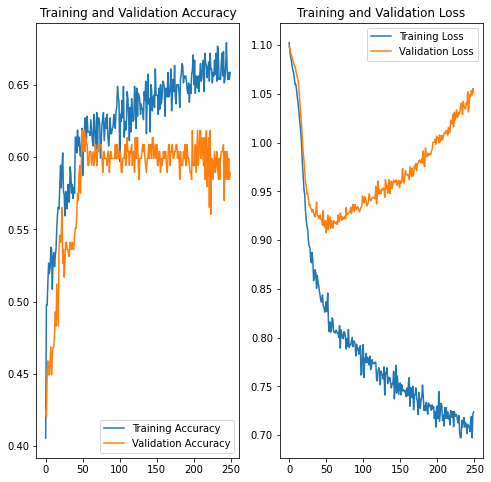

In [62]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [63]:
from sklearn.metrics import classification_report, confusion_matrix, multilabel_confusion_matrix
from sklearn.metrics import mean_squared_error, accuracy_score, precision_score, recall_score
prediction = model.predict(X_test)
prediction  = np.argmax(prediction, axis=1)
y_val=np.argmax(y_test, axis=1)
print("Accuracy : ", accuracy_score(y_val, prediction))
print("Mean Square Error : ", mean_squared_error(y_val, prediction))

print(prediction[:5])
print("Confusion Matrix for each label : ")
conf_matrix = multilabel_confusion_matrix(y_val, prediction)
print(conf_matrix)

print("Classification Report : ")
print(classification_report(y_val, prediction))

Accuracy :  0.5893719806763285
Mean Square Error :  1.0483091787439613
[0 0 0 0 0]
Confusion Matrix for each label : 
[[[ 46  56]
  [ 20  85]]

 [[148  20]
  [ 21  18]]

 [[135   9]
  [ 44  19]]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.60      0.81      0.69       105
           1       0.47      0.46      0.47        39
           2       0.68      0.30      0.42        63

    accuracy                           0.59       207
   macro avg       0.59      0.52      0.53       207
weighted avg       0.60      0.59      0.57       207



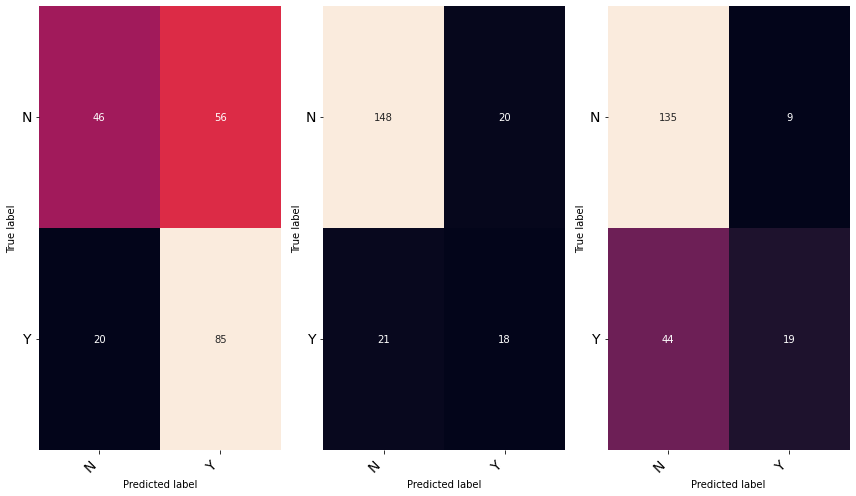

In [64]:
vis_arr = np.array(conf_matrix)
labels = ["".join("c" + str(i)) for i in range(0, 3)]
fig, ax = plt.subplots(1, 3, figsize=(12, 7))
for axes, cfs_matrix, label in zip(ax.flatten(), vis_arr, labels):
    print_confusion_matrix(cfs_matrix, axes, label, ["N", "Y"])

fig.tight_layout()
plt.show()


In [65]:
X = inputs
y = target

from sklearn.model_selection import KFold

n_splits=10
kf = KFold(n_splits=n_splits)

acc = 0
mse = 0

i = 0
for train_indices, test_indices in kf.split(X):
    #print(train_indices)
    start_train, stop_train = train_indices[0], train_indices[-1]+1
    start_test, stop_test = test_indices[0], test_indices[-1]+1
    
    mlp = model
    mlp.fit(X[start_train:stop_train], y[start_train:stop_train])
    pred = mlp.predict(X[start_test:stop_test])
    #pred
    i+=1

    pred  = np.argmax(pred, axis=1)
    y=np.argmax(y, axis=1)
    acc += accuracy_score(y[start_test:stop_test], pred)
    mse += mean_squared_error(y[start_test:stop_test], pred)


    
    print("Accuracy for batch ", i, " : ", accuracy_score(y[start_test:stop_test], pred))
    print("Mean Square Error for batch ", i, " : ", mean_squared_error(y[start_test:stop_test], pred))
    X = inputs
    y = target

print('Average Accuracy = ', acc / n_splits)
print('Average MSE = ', mse / n_splits)

30/30 [==============================] - 0s 1ms/step - loss: 0.7890 - accuracy: 0.6534
Accuracy for batch  1  :  0.6442307692307693
Mean Square Error for batch  1  :  1.1057692307692308
33/33 [==============================] - 0s 1ms/step - loss: 0.7827 - accuracy: 0.6341
Accuracy for batch  2  :  0.6730769230769231
Mean Square Error for batch  2  :  0.6730769230769231
33/33 [==============================] - 0s 1ms/step - loss: 0.7736 - accuracy: 0.6467
Accuracy for batch  3  :  0.6442307692307693
Mean Square Error for batch  3  :  0.6153846153846154
33/33 [==============================] - 0s 955us/step - loss: 0.7780 - accuracy: 0.6428
Accuracy for batch  4  :  0.6116504854368932
Mean Square Error for batch  4  :  0.7378640776699029
33/33 [==============================] - 0s 981us/step - loss: 0.7793 - accuracy: 0.6283
Accuracy for batch  5  :  0.6796116504854369
Mean Square Error for batch  5  :  0.8737864077669902
33/33 [==============================] - 0s 1ms/step - loss: 0.772

In [66]:
import keras_tuner as kt
from tensorflow import keras
def model_builder(hp):
    model = keras.Sequential()
    model.add(keras.layers.Dense(15, input_dim = 20, activation = 'relu'))


    # Tune the number of units in the first Dense layer
    # Choose an optimal value between 32-512
    hp_units = hp.Int('units', min_value=3, max_value=20, step=20)
    model.add(keras.layers.Dense(units=hp_units, activation='relu'))
    model.add(keras.layers.Dense(10, activation='relu'))
    model.add(keras.layers.Dropout(0.2))
    model.add(keras.layers.Dense(3, activation = 'softmax'))

    # Tune the learning rate for the optimizer
    # Choose an optimal value from 0.01, 0.001, or 0.0001
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

    model.compile(optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
                loss = 'categorical_crossentropy',
                metrics=['accuracy'])

    return model

In [67]:


tuner = kt.Hyperband(model_builder,
                     objective='val_accuracy',
                     max_epochs=10,
                     factor=3,
                     directory='nn_kt_dir',
                     project_name='intro_to_kt')
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
tuner.search(X_train, y_train, epochs=200, validation_split=0.2, callbacks=[stop_early])

# Get the optimal hyperparameters
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"""
The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is {best_hps.get('units')} and the optimal learning rate for the optimizer
is {best_hps.get('learning_rate')}.
""")

INFO:tensorflow:Reloading Oracle from existing project nn_kt_dir/intro_to_kt/oracle.json
INFO:tensorflow:Reloading Tuner from nn_kt_dir/intro_to_kt/tuner0.json
INFO:tensorflow:Oracle triggered exit

The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is 3 and the optimal learning rate for the optimizer
is 0.001.



In [68]:
model = tuner.hypermodel.build(best_hps)
history = model.fit(X_train, y_train, epochs=200, validation_split=0.2)

val_acc_per_epoch = history.history['val_accuracy']
best_epoch = val_acc_per_epoch.index(max(val_acc_per_epoch)) + 1
print('Best epoch: %d' % (best_epoch,))

hypermodel = tuner.hypermodel.build(best_hps)

# Retrain the model
history = hypermodel.fit(X_train, y_train, epochs=best_epoch, validation_split=0.2)


Epoch 1/200
21/21 [==============================] - 1s 12ms/step - loss: 1.0737 - accuracy: 0.4924 - val_loss: 1.0599 - val_accuracy: 0.5422
Epoch 2/200
21/21 [==============================] - 0s 3ms/step - loss: 1.0647 - accuracy: 0.4924 - val_loss: 1.0522 - val_accuracy: 0.5422
Epoch 3/200
21/21 [==============================] - 0s 3ms/step - loss: 1.0536 - accuracy: 0.5045 - val_loss: 1.0397 - val_accuracy: 0.5422
Epoch 4/200
21/21 [==============================] - 0s 3ms/step - loss: 1.0483 - accuracy: 0.5106 - val_loss: 1.0358 - val_accuracy: 0.5422
Epoch 5/200
21/21 [==============================] - 0s 2ms/step - loss: 1.0367 - accuracy: 0.5182 - val_loss: 1.0302 - val_accuracy: 0.5422
Epoch 6/200
21/21 [==============================] - 0s 2ms/step - loss: 1.0354 - accuracy: 0.5167 - val_loss: 1.0259 - val_accuracy: 0.5422
Epoch 7/200
21/21 [==============================] - 0s 3ms/step - loss: 1.0273 - accuracy: 0.5136 - val_loss: 1.0238 - val_accuracy: 0.5422
Epoch 8/200


In [69]:
eval_result = hypermodel.evaluate(X_test, y_test)
print("[test loss, test accuracy]:", eval_result)

7/7 [==============================] - 0s 1ms/step - loss: 0.9652 - accuracy: 0.5845
[test loss, test accuracy]: [0.9652019143104553, 0.5845410823822021]


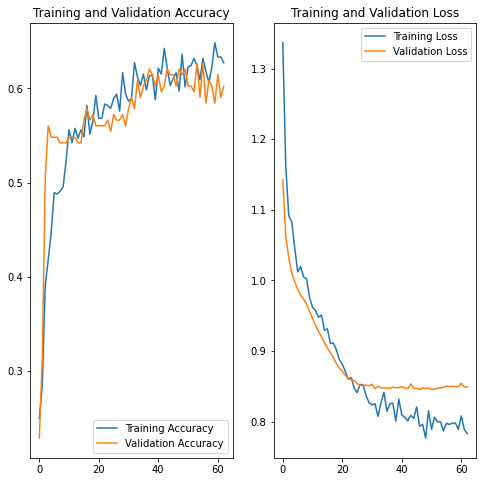

In [70]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(best_epoch)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [71]:
prediction = hypermodel.predict(X_test)
prediction  = np.argmax(prediction, axis=1)
y_val=np.argmax(y_test, axis=1)

print("Accuracy : ", accuracy_score(y_val, prediction))
print("Mean Square Error : ", mean_squared_error(y_val, prediction))

print(prediction[:5])
print("Confusion Matrix for each label : ")
conf_matrix = multilabel_confusion_matrix(y_val, prediction)
print(conf_matrix)

print("Classification Report : ")
print(classification_report(y_val, prediction))

Accuracy :  0.5845410628019324
Mean Square Error :  1.1111111111111112
[0 2 0 2 0]
Confusion Matrix for each label : 
[[[ 46  56]
  [ 23  82]]

 [[149  19]
  [ 19  20]]

 [[133  11]
  [ 44  19]]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.59      0.78      0.67       105
           1       0.51      0.51      0.51        39
           2       0.63      0.30      0.41        63

    accuracy                           0.58       207
   macro avg       0.58      0.53      0.53       207
weighted avg       0.59      0.58      0.56       207



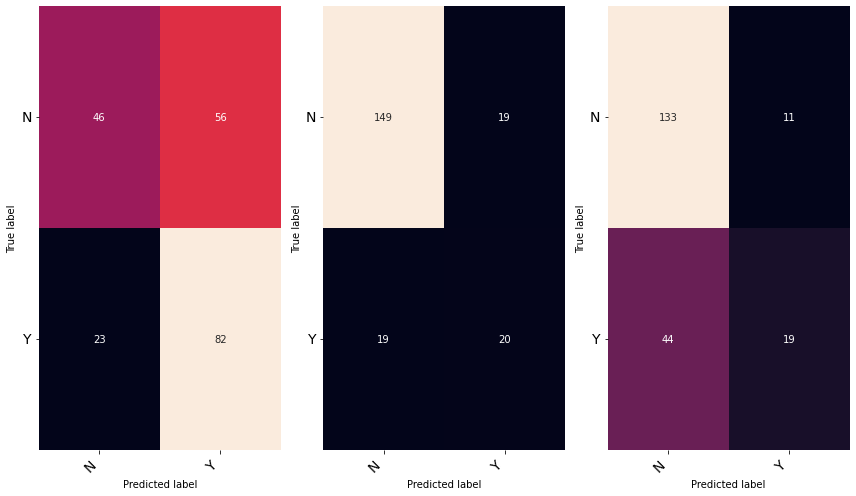

In [73]:
vis_arr = np.array(conf_matrix)
labels = ["".join("c" + str(i)) for i in range(0, 3)]
fig, ax = plt.subplots(1, 3, figsize=(12, 7))
for axes, cfs_matrix, label in zip(ax.flatten(), vis_arr, labels):
    print_confusion_matrix(cfs_matrix, axes, label, ["N", "Y"])

fig.tight_layout()
plt.show()
